In [105]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

* Setting up ability to import functions from src folder

In [106]:
sys.path.insert(
    0, "../../gtd_exploration")

In [107]:
from src import clean_data as cd

* Reads in the full_data csv
* Sets low_memory to false to better interpret the values in the columns, since there is a lot of mixed data types in the csv

In [108]:
world_df = pd.read_csv("../data/full_data.csv", index_col=0, low_memory=False)

* Makes a copy of the original df, with only the United States data

In [109]:
usa_df = world_df[world_df["country_txt"] == "United States"].copy()

* Creates a new column 'date' that is of data type datetime

In [110]:
usa_df["date"] = cd.create_date_column(usa_df)

* Top 5 terrorist groups that attack the US from 1970 - 2020

In [111]:
query = (usa_df["doubtterr"] == 0) | (usa_df["doubtterr"] == -9)
top_5_groups = usa_df[query].groupby("gname").size().sort_values(ascending=False).iloc[:5]
top_5_groups

gname
Unknown                                          482
Anti-Abortion extremists                         232
Left-Wing Militants                              121
Fuerzas Armadas de Liberacion Nacional (FALN)    117
White supremacists/nationalists                  104
dtype: int64

* Top 5 terrorist groups that attack the US from 2010 - 2020

In [112]:
query = (usa_df["year"] >= 2010) & (usa_df["doubtterr"] == 0)
modern_groups = usa_df[query]
top_5_modern = modern_groups.groupby("gname").size().sort_values(ascending=False)[:5]

<Axes: title={'center': 'Top 5 groups that attack the most (2010- 2020)'}, xlabel='Amount of attacks', ylabel='Group name'>

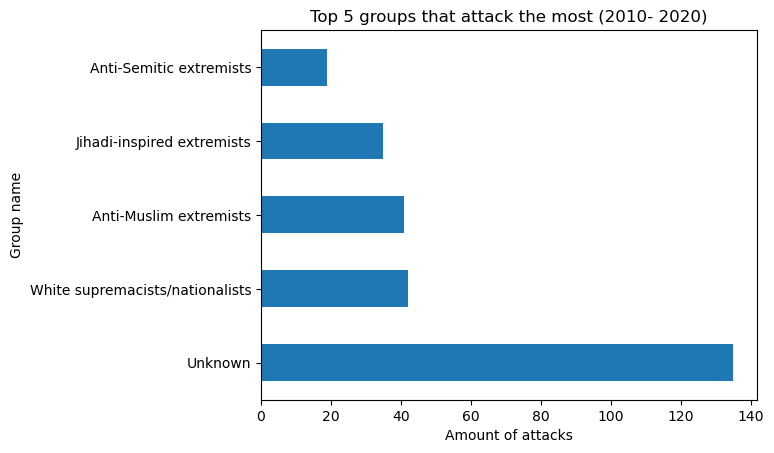

In [113]:
top_5_modern.plot.barh(title="Top 5 groups that attack the most (2010- 2020)",
                       ylabel="Group name", xlabel="Amount of attacks")

<Axes: title={'center': 'Top 5 groups that attack the most (1970 - 2020)'}, xlabel='amount of attacks', ylabel='group name'>

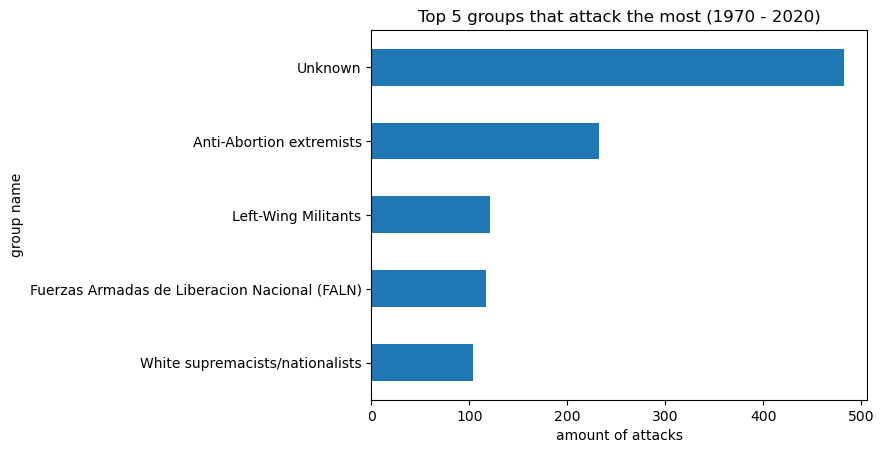

In [132]:
top_5_groups.sort_values().plot.barh(title="Top 5 groups that attack the most (1970 - 2020)",
                       ylabel="group name", xlabel="amount of attacks")

* Timeline for 1970 - 2020

In [115]:
groups = top_5_groups.index.values
query = usa_df["gname"].isin(groups) & ((usa_df["doubtterr"] == 0) | (usa_df["doubtterr"] == -9))
top_5_df = usa_df[query]
top_5_timeline = top_5_df.groupby(["gname", "year"])["year"].count()

In [116]:
colors = plt.get_cmap("tab10").colors

In [117]:
seventy_eighty_perc = (top_5_df["year"].value_counts(True) * 100).sort_index()[:11].sum()
seventy_eighty_perc

44.88636363636363

Text(1980, 60, '45% of attacks happened from 1970-1980')

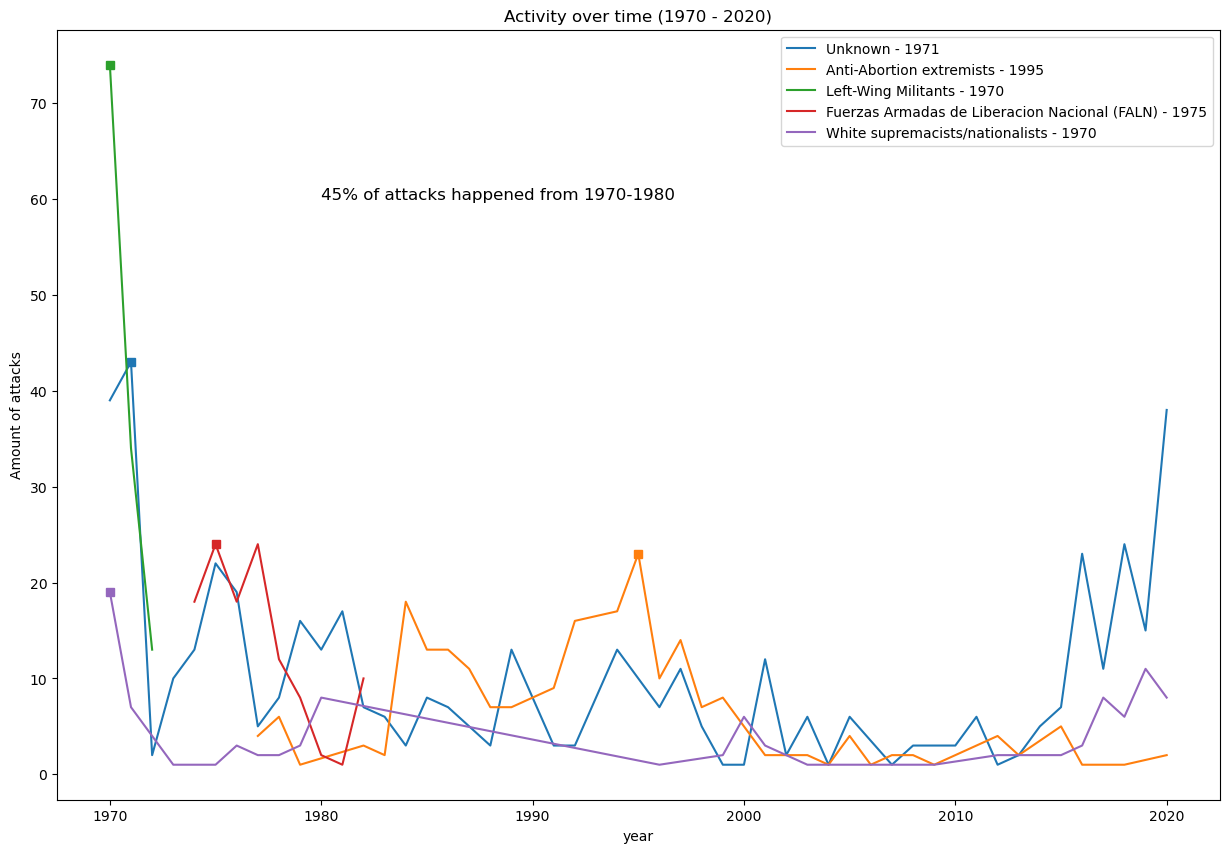

In [118]:
for idx, group in enumerate(groups):
    most_active_year = top_5_timeline[group].idxmax()
    amount_for_most = top_5_timeline[group][most_active_year]
    plt.plot(most_active_year, amount_for_most, marker="s", color=colors[idx])
    top_5_timeline[group].plot.line(legend=True, label=f"{group} - {most_active_year}", 
                                    figsize=(15, 10), title="Activity over time (1970 - 2020)", 
                                    ylabel="Amount of attacks", color=colors[idx])
plt.text(1980, 60,
         s=f"{round(seventy_eighty_perc)}% of attacks happened from 1970-1980", size=12)
  

* Timeline 2010 - 2020

In [119]:
groups = top_5_modern.index.values
query = (usa_df["gname"].isin(groups)) & (
    usa_df["year"] >= 2010) & (usa_df["doubtterr"] == 0)
top_modern_df = usa_df[query]
top_modern_timeline = top_modern_df.groupby(["gname", "year"])["year"].count()

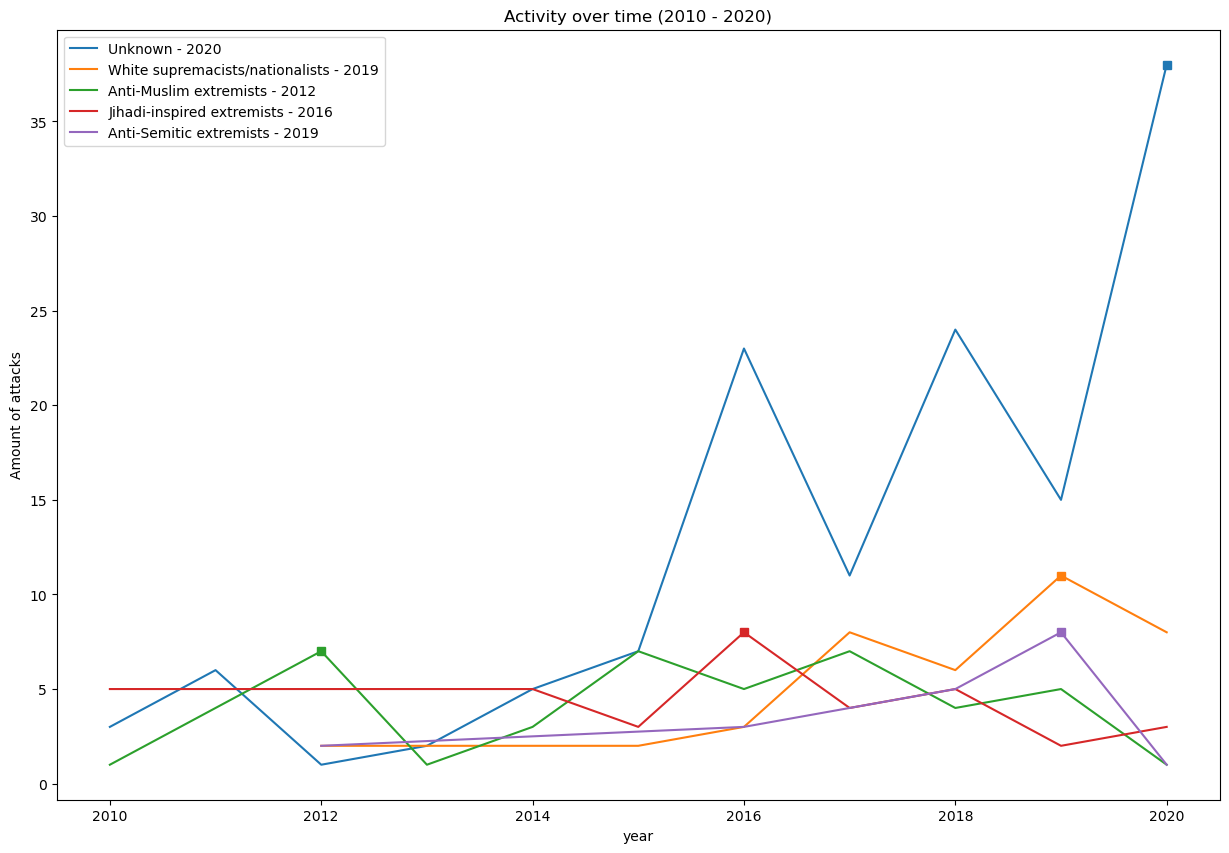

In [120]:
for idx, group in enumerate(groups):
    most_active_year = top_modern_timeline[group].idxmax()
    amount_for_most = top_modern_timeline[group][most_active_year]
    plt.plot(most_active_year, amount_for_most, marker="s", color=colors[idx])
    top_modern_timeline[group].plot.line(legend=True, label=f"{group} - {most_active_year}",
                                    figsize=(15, 10), title="Activity over time (2010 - 2020)",
                                    ylabel="Amount of attacks", color=colors[idx])

* Most common attack from each group 1970 - 2020

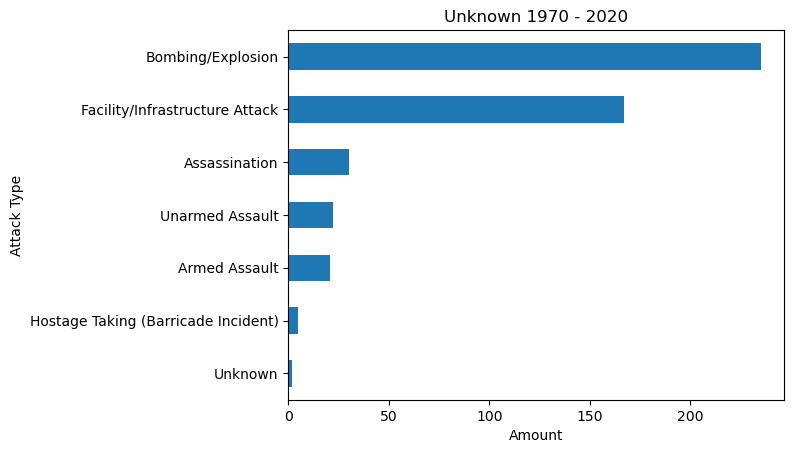

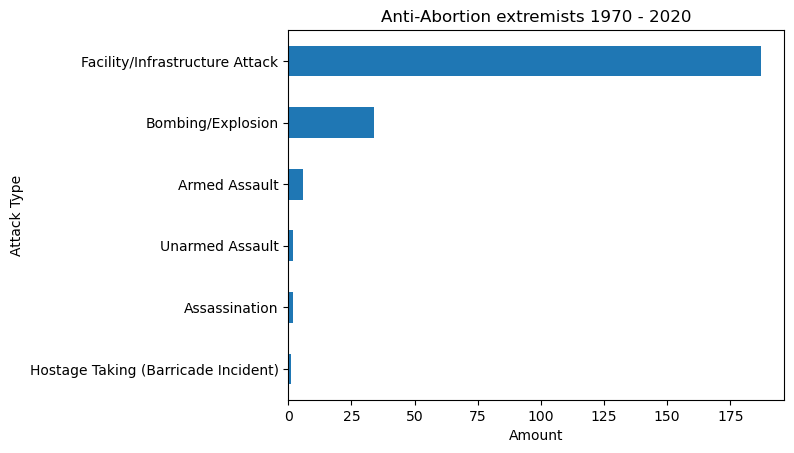

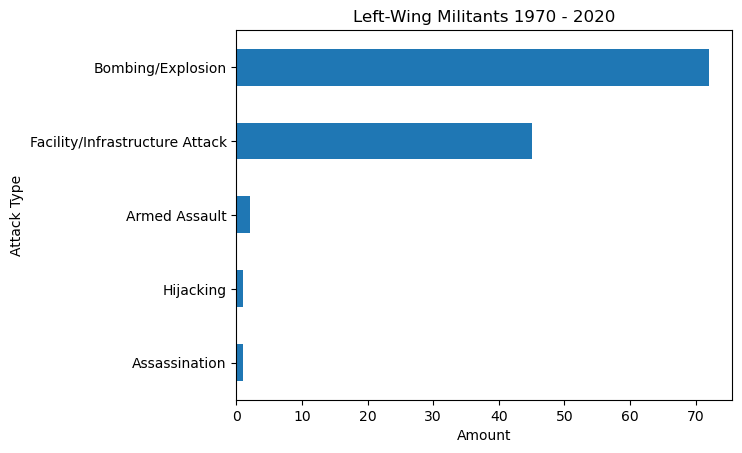

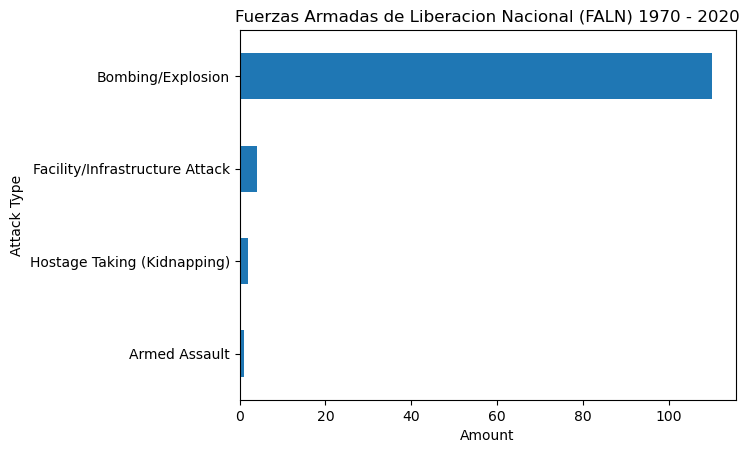

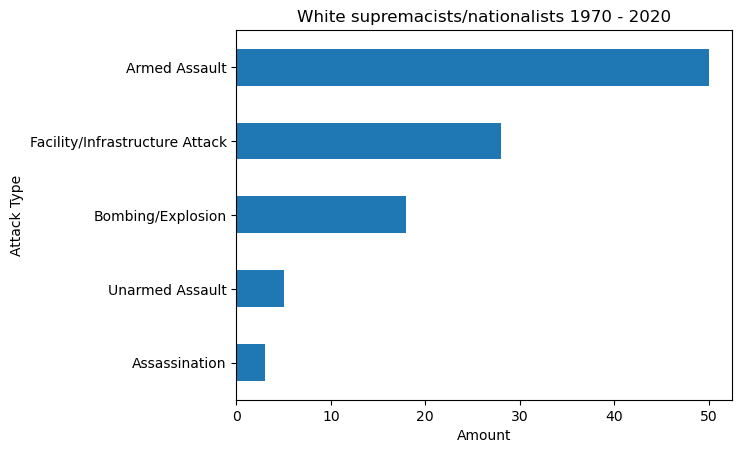

In [131]:
attack_types = top_5_df["attacktype1_txt"].unique()
groups = top_5_groups.index.values
types_per_group = top_5_df.groupby(["gname", "attacktype1_txt"]).size()
types_per_group
for idx, group in enumerate(groups):
    fig, ax = plt.subplots()
    types_per_group[group].sort_values().plot.barh(
        ax=ax, title=f"{group} 1970 - 2020", ylabel="Attack Type", xlabel="Amount")

* Most common attack in general

<Axes: title={'center': 'All groups 1970 - 2020'}, xlabel='Amount', ylabel='Attack Type'>

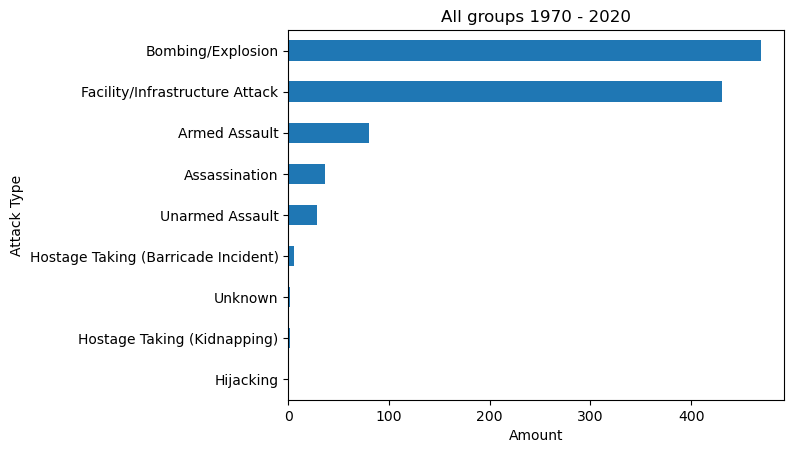

In [133]:
top_5_df.groupby("attacktype1_txt").size().sort_values().plot.barh(title="All groups 1970 - 2020", ylabel="Attack Type",
                                                     xlabel="Amount")

* Most common attacks 2010 - 2020

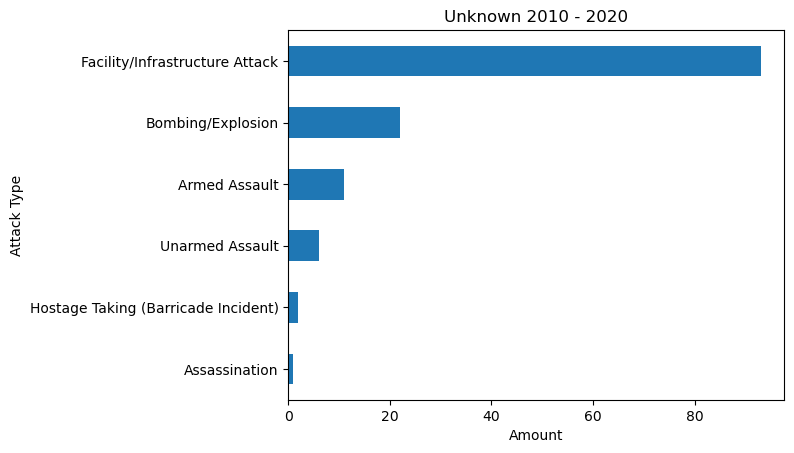

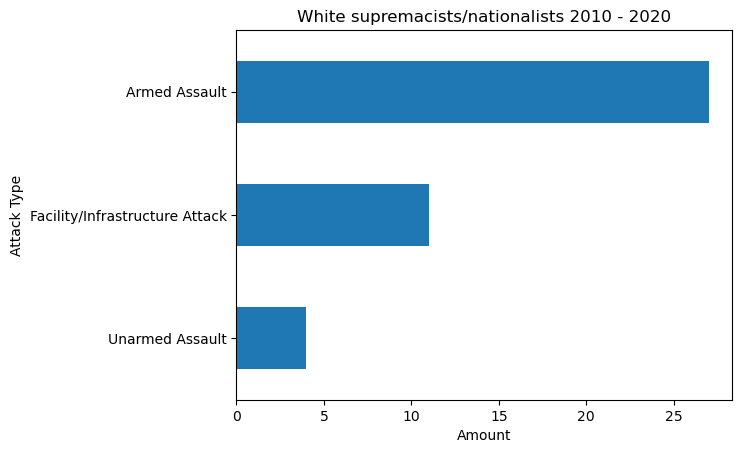

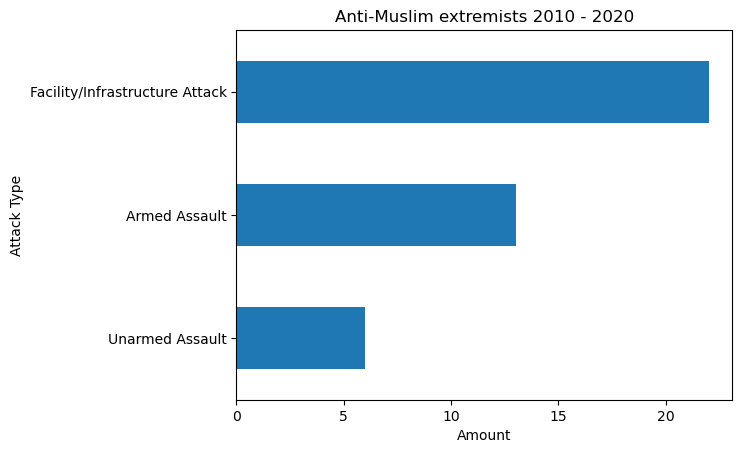

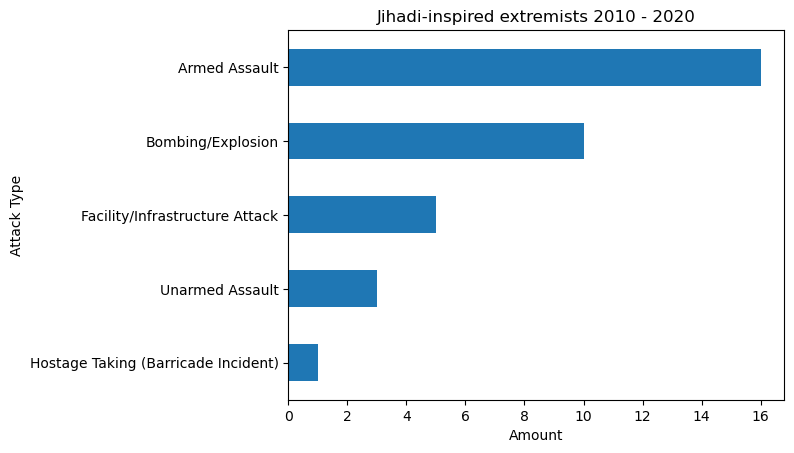

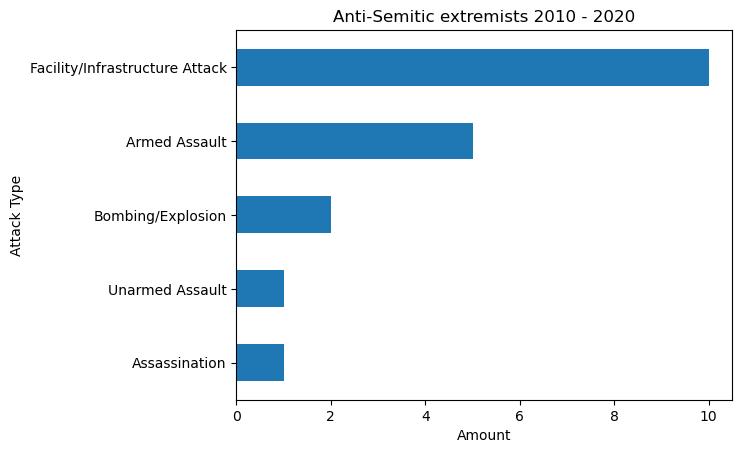

In [134]:
attack_types = modern_groups["attacktype1_txt"].unique()
groups = top_5_modern.index.values
types_per_group = modern_groups.groupby(["gname", "attacktype1_txt"]).size()
types_per_group
for idx, group in enumerate(groups):
    fig, ax = plt.subplots()
    types_per_group[group].sort_values().plot.barh(
        ax=ax, title=f"{group} 2010 - 2020", ylabel="Attack Type", xlabel="Amount")

<Axes: title={'center': 'All groups 2010 - 2020'}, xlabel='Amount', ylabel='Attack Type'>

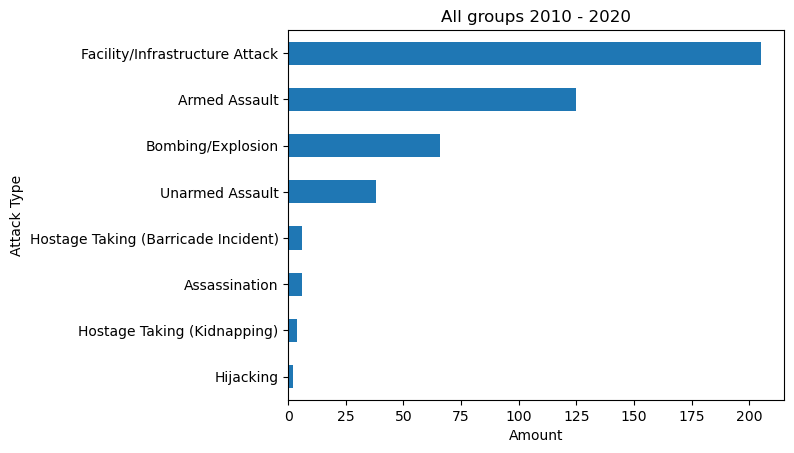

In [135]:
modern_groups.groupby("attacktype1_txt").size().sort_values().plot.barh(title="All groups 2010 - 2020", ylabel="Attack Type",
                                                     xlabel="Amount")

* Top 10 attacked targets 1970 - 2020

In [125]:
top_10_targets = top_5_df.groupby(
    ["targtype1_txt", "targsubtype1_txt"]).size().sort_values(ascending=False)[:10]

<Axes: title={'center': 'Top 10 Targets 1970 - 2020'}, xlabel='Amount', ylabel='Target'>

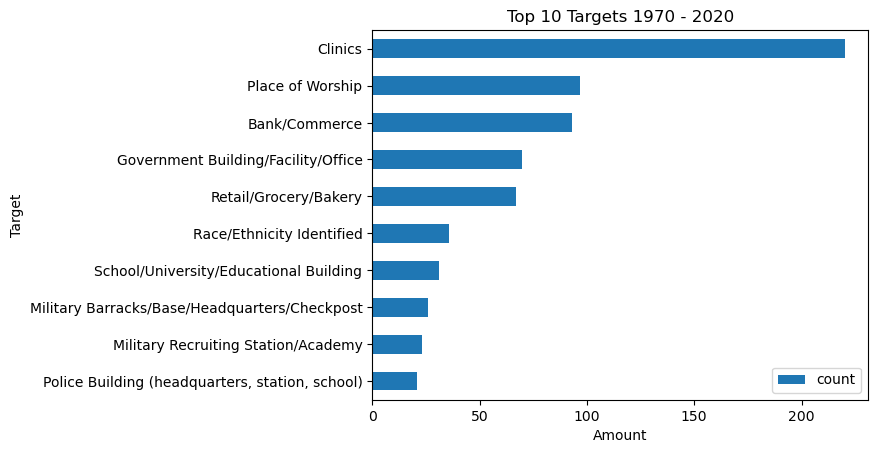

In [137]:
top_10_targets.reset_index(name="count")[
    ["targsubtype1_txt", "count"]].sort_values(by="count").plot.barh(x="targsubtype1_txt", y="count",
                                             title="Top 10 Targets 1970 - 2020", ylabel="Target",
                                             xlabel="Amount")

* Top 10 attacked targets from 2010 - 2020

In [127]:
modern_targets = top_modern_df.groupby(
    ["targtype1_txt", "targsubtype1_txt"]).size().sort_values(ascending=False)[:10]

<Axes: title={'center': 'Top 10 Targets 2010 - 2020'}, xlabel='Amount', ylabel='Target'>

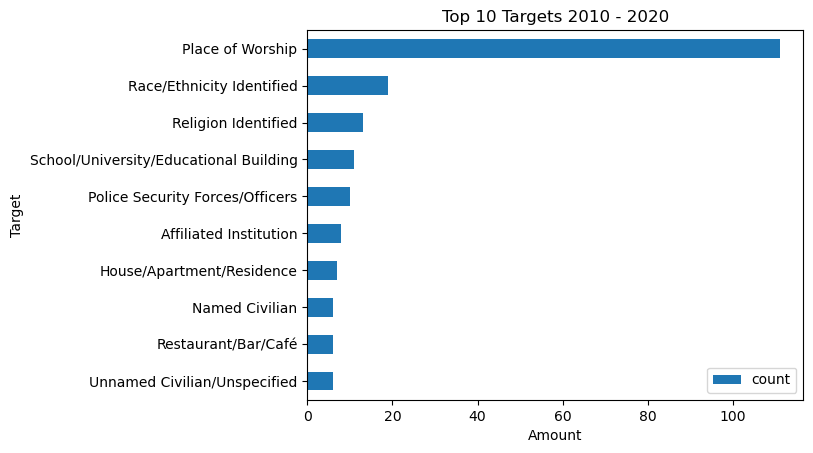

In [138]:
modern_targets.reset_index(name="count")[
    ["targsubtype1_txt", "count"]].sort_values(by="count").plot.barh(x="targsubtype1_txt", y="count",
                                             title="Top 10 Targets 2010 - 2020",
                                             ylabel="Target", xlabel="Amount")